In [21]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [3]:
# importing train and test data
df_train = pd.read_csv("../data/raw/train.csv")
df_test = pd.read_csv("../data/raw/test.csv")

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df_train.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities      ...           PoolArea  \
count     91     1460        1460      1460      ...        1460.000000   
unique     2        4           4         2      ...                NaN   
top     Grvl      Reg         Lvl    AllPub      ...                NaN   
freq      50      925        1311      1459      ...                NaN   
mean     NaN      NaN         NaN       NaN      ...           2.758904   
std      NaN      NaN         NaN       NaN      ...          40.177307   
min      NaN      NaN         NaN       NaN      ...           0.000000   
25%      NaN      NaN         NaN       NaN      ...           0.000000   
50%      NaN      NaN         NaN       NaN      ...           0.000000   
75%      NaN      NaN         NaN       NaN      ...           0.000000   
max      NaN      NaN         NaN       NaN      ...         738.000000   

       PoolQC  Fence MiscFeature       MiscVal       MoSold       YrSold  \
count       7    281          54   1460.000000  1460.000000  1460.000000   
unique      3      4           4           NaN          NaN          NaN   
top        Gd  MnPrv        Shed           NaN          NaN          NaN   
freq        3    157          49           NaN          NaN          NaN   
mean      NaN    NaN         NaN     43.489041     6.321918  2007.815753   
std       NaN    NaN         NaN    496.123024     2.703626     1.328095   
min       NaN    NaN         NaN      0.000000     1.000000  2006.000000   
25%       NaN    NaN         NaN      0.000000     5.000000  2007.000000   
50%       NaN    NaN         NaN      0.000000     6.000000  2008.000000   
75%       NaN    NaN         NaN      0.000000     8.000000  2009.000000   
max       NaN    NaN         NaN  15500.000000    12.000000  2010.000000   

        SaleType  SaleCondition      SalePrice  
count       1460           1460    1460.000000  
unique         9              6            NaN  
top           WD         Normal            NaN  
freq        1267           1198            NaN  
mean         NaN            NaN  180921.195890  
std          NaN            NaN   79442.502883  
min          NaN            NaN   34900.000000  
25%          NaN            NaN  129975.000000  
50%          NaN            NaN  163000.000000  
75%          NaN            NaN  214000.000000  
max          NaN            NaN  755000.000000  

[11 rows x 81 columns]

In [7]:
# dropping Ids
df_train = df_train.drop('Id', axis=1)

In [8]:
df_train['SalePrice'].plot(kind='hist')

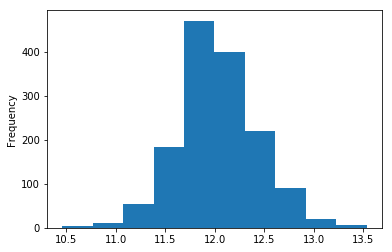

In [9]:
# transform the target to fit a normal distribution
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
df_train['SalePrice'].plot(kind='hist')

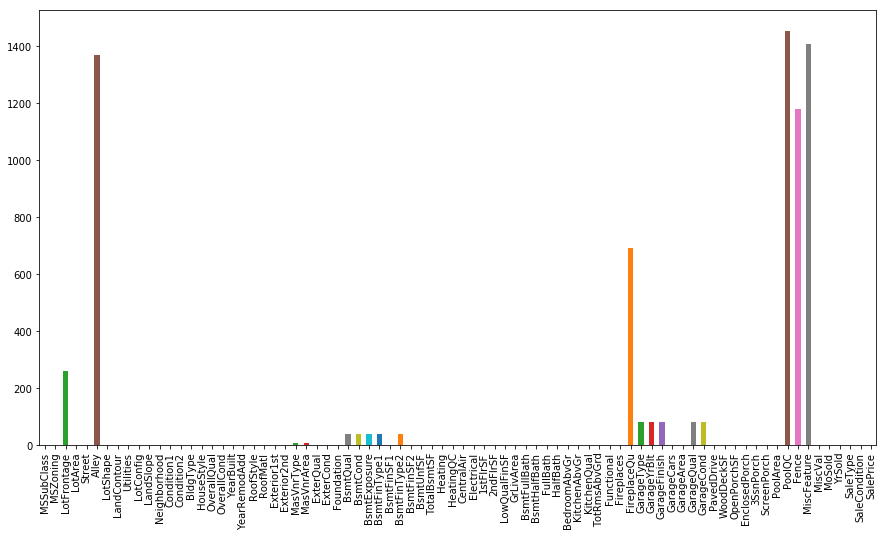

In [10]:
missing = df_train.isnull().sum()
missing.plot(kind='bar',figsize=(15,8))

In [11]:
# transforming numerical features
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df_train[skewed_feats] = np.log1p(df_train[skewed_feats])

In [12]:
# Dummy variables
df_train = pd.get_dummies(df_train)

In [13]:
df_train = df_train.fillna(df_train.mean())

In [20]:
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice               1.000000
OverallQual             0.817185
GrLivArea               0.730254
GarageCars              0.680625
GarageArea              0.650888
1stFlrSF                0.608955
FullBath                0.594771
YearBuilt               0.586570
YearRemodAdd            0.565608
TotRmsAbvGrd            0.534422
Foundation_PConc        0.530840
ExterQual_Gd            0.509675
GarageYrBlt             0.500449
Fireplaces              0.489450
HeatingQC_Ex            0.466706
BsmtQual_Ex             0.463991
OpenPorchSF             0.459948
BsmtFinType1_GLQ        0.440764
GarageFinish_Fin        0.418881
MasVnrArea              0.417418
GarageType_Attchd       0.415787
KitchenQual_Ex          0.413937
KitchenQual_Gd          0.406601
LotArea                 0.399923
TotalBsmtSF             0.372838
GarageCond_TA           0.365783
ExterQual_Ex            0.356134
Neighborhood_NridgHt    0.351803
CentralAir_Y            0.35

In [43]:
### Modeling
y = df_train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.3, random_state = 0)
X_train = X_train.drop(['SalePrice'],axis=1) 

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

X_train : (1022, 288)
X_test : (438, 289)
y_train : (1022,)
y_test : (438,)


In [44]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)


lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0006


Lasso RMSE on Training set : 0.1173153937381584


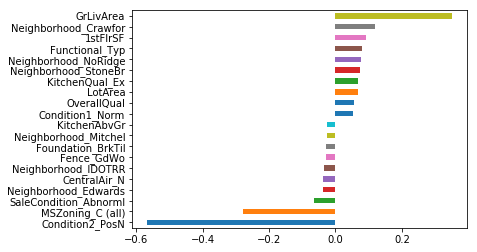

In [46]:
print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
coefs = pd.Series(lasso.coef_, index = X_train.columns )
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind='barh')